## Hello DIGIT world!
Welcome, DIGIT student Python adventurer! This is the **Jupyter Notebook** version of my [exploring-nltk.py](exploring-nltk.py) file. The cells in the notebook will help me demonstrate particular things in class without having to comment everything else out. Jupyter notebooks are written with a combination of markdown cells (like this) for documentation, and cells with executable scripts. You usually have to run the cells in order, but you can choose which ones to run. I'm splitting up my exploring-nltk.py file into tidy cells because my commenting was getting a bit out of hand inside the file.

### Installs before imports 
You only need to make installations ONCE in your Python virtual environment (your venv). After that, you're good to go.

To install things, open a shell (or use the terminal in PyCharm CE), and be sure the venv is activated--usually you see (venv) in parentheseses. You can activate your venv like this, after navigating to the directory above your .venv file:
* On Mac: **.venv/bin/activate**
* On Windows: **.venv/bin/activate.bat**

We need to install nltk first: in your shell or the Pycharm terminal with .venv activated, run the following:

**pip install nltk**

Some of you might need to write:
**pip3 install nltk**
(If this is you and you're annoyed about it, make an alias for pip in your .bashrc or .zshrc to point to pip3 every time you type pip.)

*If you, like me, have multiple versions of python on your machine*, run:

**python3.12 -m pip install nltk**

#### Other libraries to install:
These next ones are for plotting interactive graphs:
* **pip install matplotlib**
* **pip install tk**

#### For making Jupyter notebooks like this:
For me to make this Jupyter notebook, I needed to install:
* **python3.12 -m pip install notebook**
* **python3.12 -m pip install notebook ipykernel**
Then I just ran the following to launch the. notebook in a web browser for editing:
**python3.12 -m jupyter notebook** or just **jupyter notebook** 

### After installs, time to start writing the script, with import lines
Then we can import these things in your Python script, which is what our first executable code cell is doing:

In [1]:
import nltk
import nltk.corpus
# The next line downloads all the example texts used in the NLTK book at https://www.nltk.org/book !
# You can comment out the download line after the first time you do it.
nltk.download('book')
from nltk.book import *
# The next line lets us do GET requests from remote URLs on the web:
from urllib import request
# The following import lines are for plotting interactive visualizations in Python
import matplotlib
import matplotlib.pyplot as plt
import tk

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /Users/eeb4/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /Users/eeb4/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /Users/eeb4/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/eeb4/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /Users/eeb4/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /Users/eeb4/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


### Smoke test for graphing libraries
After the imports, run the next cells to see if graphing works.

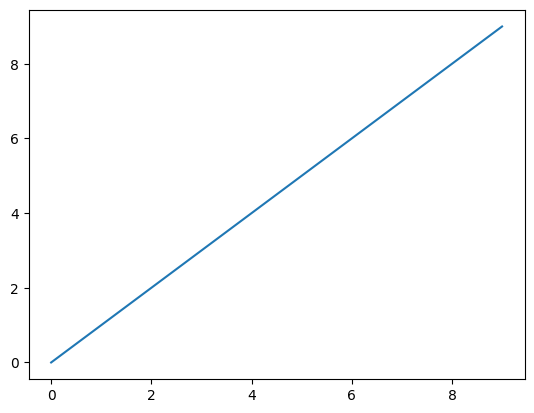

In [2]:
plt.plot(range(10))
plt.show()

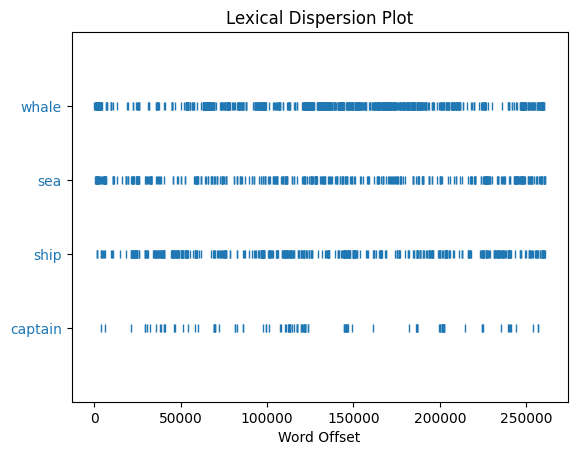

In [3]:
### See how these words are dispersed in NLTK text 1 (Moby Dick)
words = ["whale", "sea", "ship", "captain"]
nltk.draw.dispersion_plot(text1, words)
plt.show()

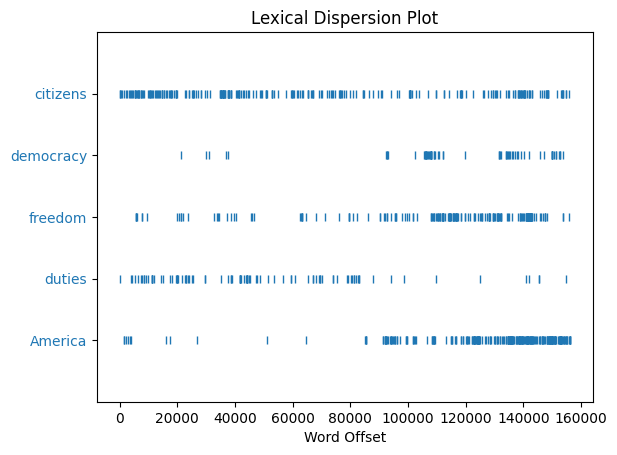

In [58]:
# Another dispersion plot written closer to the NLTK example:
# Choose the text first (text 4 is Inaugural Addresses):
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])
plt.show()


### Take a look at some common contexts for uses of the words
"monstrous" and "very" in text1
Try changing these up for different texts.

In [57]:
text6.common_contexts(["find","seek"])

to_the you_the


### Look for similar words
This looks for words that appear in the same context as the word you enter
SO, I used text6 ("Monty Python and the Holy Grail") for this next example:

In [66]:
text6.similar('grail')

britons same rabbit lord system nose forest curtains questions scene
who saxons one land what coconuts two husk air cart


### Pulling files from a web url
For this, let's pull *Blithedale Romance* direct from Project Gutenberg (just like David did with it while introducing invisible XML).
I'm also demonstrating **how to make "picture string" variables** so you can easily know what you're printing out in the console:

In [74]:
# Blithedale Romance text file on Project Gutenberg
bookurl= "https://www.gutenberg.org/cache/epub/2081/pg2081.txt"
response = request.urlopen(bookurl)
br = response.read().decode('utf8')
type(br)
print(len(br))
# make a variable
howLong = len(br)
# picture string version! 
print(f"howLong = {howLong}")
novelSlice = br[:500]
print(f"novelSlice = {novelSlice}")

# splitEmUp = br.split()
# print(f"splitEmUp = {splitEmUp}")

for token in splitEmUp:
    if token.endswith('ing'):
        print(token)

464044
howLong = 464044
novelSlice = ﻿The Project Gutenberg eBook of The Blithedale Romance
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using t
using
evening
returning
attending
falling
unfolding
turning
trying
repeating
hesitating
going
something
standing
revealing
getting
wondering
involving
going
retaining
stopping
Arriving
nothing
drinking
setting
getting
roaring
inspiring
deluding
spreading
beginning
morning
partaking
whitening
puffing
burning
being
going
quitting
flinging
travelling
drifting
coming
alighting
riding
burning
encountering
unmuffling
listening
unflagging
beginning
melting
awaiting
contras

### Make a Text Concordance 
Use the concordance feature...In the NLTK book, they introduce this with the prefab text of Jane Austen's Emma (already in NLTK's text corpora). I bet we can do this with our split-up Blithedale text that we pulled in from Project Gutenberg...
**NOTE**: You need to execute the previous cell for the next one to know the variables it needs.

Basically, to make the concordance, you have to convert the list of tokens into a special NLTK **text object**, and then run the concordance feature.

In [106]:
concordance = nltk.Text(splitEmUp).concordance("living")
print(f"concordance = {concordance}")

Displaying 7 of 7 matches:
his lady-love,--in short, we were a living epitome of defunct fashions, and th
leafy shadow where he stood, like a living tip of fire. He carried a stick wit
tural and immediate. It is with the living voice alone that she can compel the
ne, and twenty other faces that are living now, shall be hung up; and as for m
ke a gray kennel-rat than any other living thing, he began to take the aspect 
l me how all things were. The first living creature that I met was a partridge
orcibly conscious of an intense and living pain there. Her glance, wandering w
concordance = None


### Frequency Distributions
Here's an example plotting of frequency distributions. This is from the NLTK book, and you might be wondering why they didn't just use text4 for the corpus--which has all the addresses baked together in one file. They pulled from a **different** set, a collection of texts with each address stored in just one file, because the year of each address is in the fileid property! Being 

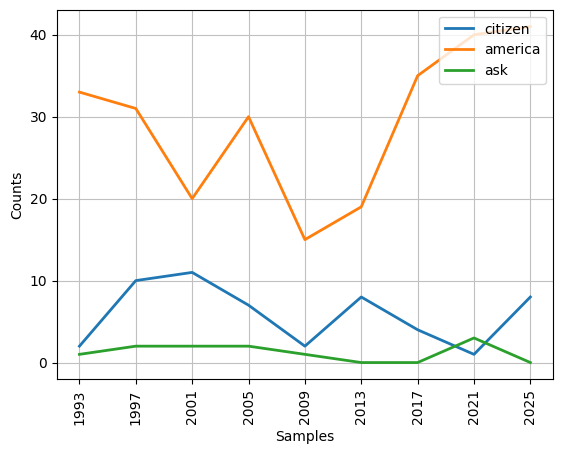

In [120]:
from nltk.corpus import inaugural
inaugural.fileids()
cfd = nltk.ConditionalFreqDist(
    (target,fileid[:4])
    for fileid in inaugural.fileids()
    # I added the next line to help make the plot more legible!
    if fileid[:4] > "1990"
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target))
cfd.plot()
plt.show()